In [ ]:
Tugas 1: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("EmployeeData").getOrCreate()

data = [
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'F', 2500, 2)
]
columns = ['Nama', 'Umur', 'JK', 'Gaji', 'ID Departemen']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('Karyawan')

# Menampilkan Data
spark.sql('SELECT * FROM Karyawan').show()
spark.sql('SELECT Nama, Umur FROM Karyawan WHERE Gaji > 3000').show()
spark.sql('SELECT AVG(Gaji) AS Rataan_Gaji FROM Karyawan').show()

+-----+----+---+----+-------------+
| Nama|Umur| JK|Gaji|ID Departemen|
+-----+----+---+----+-------------+
|Hanif|  34|  L|3000|            1|
|Andra|  28|  L|4100|            2|
|Putri|  23|  P|2700|            1|
|Bagus|  23|  L|3100|            1|
|Nanda|  25|  F|2500|            2|
+-----+----+---+----+-------------+

+-----+----+
| Nama|Umur|
+-----+----+
|Andra|  28|
|Bagus|  23|
+-----+----+

+-----------+
|Rataan_Gaji|
+-----------+
|     3080.0|
+-----------+



In [ ]:
Tugas 2: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.

In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("EmployeeData").getOrCreate()

data = [
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'F', 2500, 2)
]
columns = ['Nama', 'Umur', 'JK', 'Gaji', 'ID Departemen']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('Karyawan')
result = spark.sql('''
SELECT 
    JK AS Gender,
    SUM(Gaji) AS TotalSalary,
    Umur AS Age
FROM Karyawan
GROUP BY JK, Umur
ORDER BY Umur
''')

# Menampilkan Hasil
result.show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     P|       2700| 23|
|     L|       3100| 23|
|     F|       2500| 25|
|     L|       4100| 28|
|     L|       3000| 34|
+------+-----------+---+



In [ ]:
Tugas Tambahan 2:

1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji dTugas 3: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.i atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

spark = SparkSession.builder.appName("EmployeeData").getOrCreate()

data = [
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'P', 2500, 2)
]
columns = ['Nama', 'Umur', 'JK', 'Gaji', 'ID_Departemen']
df = spark.createDataFrame(data, schema=columns)

avg_salary_dept = df.groupBy("ID_Departemen").agg(
    F.avg("Gaji").alias("Rata_rata_Gaji")
)

print("Rata-rata gaji per departemen")
avg_salary_dept.show()

# Hitung rata-rata gaji per gender
avg_salary_gender = df.groupBy("JK").agg(
    F.avg("Gaji").alias("Rata_rata_Gaji_Gender")
)

# Gabungkan agar bisa dibandingkan
df_with_avg = df.join(avg_salary_gender, on="JK", how="left")

# Filter karyawan dengan gaji di atas rata-rata gender
above_avg_gender = df_with_avg.filter(F.col("Gaji") > F.col("Rata_rata_Gaji_Gender"))

print("Karyawan dengan gaji di atas rata-rata gender masing-masing")
above_avg_gender.select("Nama", "JK", "Gaji", "Rata_rata_Gaji_Gender").show()

# Gunakan Window function
window_spec = Window.partitionBy("ID_Departemen").orderBy(F.desc("Gaji"))

ranked = df.withColumn(
    "Ranking_Gaji_Departemen",
    F.rank().over(window_spec)
)

print("Ranking karyawan berdasarkan gaji dalam departemen")
ranked.orderBy("ID_Departemen", "Ranking_Gaji_Departemen").show()

Rata-rata gaji per departemen
+-------------+------------------+
|ID_Departemen|    Rata_rata_Gaji|
+-------------+------------------+
|            1|2933.3333333333335|
|            2|            3300.0|
+-------------+------------------+

Karyawan dengan gaji di atas rata-rata gender masing-masing
+-----+---+----+---------------------+
| Nama| JK|Gaji|Rata_rata_Gaji_Gender|
+-----+---+----+---------------------+
|Andra|  L|4100|               3400.0|
|Putri|  P|2700|               2600.0|
+-----+---+----+---------------------+

Ranking karyawan berdasarkan gaji dalam departemen
+-----+----+---+----+-------------+-----------------------+
| Nama|Umur| JK|Gaji|ID_Departemen|Ranking_Gaji_Departemen|
+-----+----+---+----+-------------+-----------------------+
|Bagus|  23|  L|3100|            1|                      1|
|Hanif|  34|  L|3000|            1|                      2|
|Putri|  23|  P|2700|            1|                      3|
|Andra|  28|  L|4100|            2|                  

In [ ]:
Tugas 3: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("EmployeeData").getOrCreate()

data = [
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'P', 2500, 2)
]
columns = ['Nama', 'Umur', 'JK', 'Gaji', 'ID_Departemen']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('Karyawan')

spark.sql('''
SELECT 
    Nama,
    Umur,
    Gaji,
    ROW_NUMBER() OVER (PARTITION BY Umur ORDER BY Gaji DESC) AS rank
FROM Karyawan
''').show()

+-----+----+----+----+
| Nama|Umur|Gaji|rank|
+-----+----+----+----+
|Bagus|  23|3100|   1|
|Putri|  23|2700|   2|
|Nanda|  25|2500|   1|
|Andra|  28|4100|   1|
|Hanif|  34|3000|   1|
+-----+----+----+----+



In [ ]:
Tugas 4: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.

In [12]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Pertemuan9").getOrCreate()

karyawan = spark.createDataFrame([
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'P', 2500, 2)
], ['Nama', 'Umur', 'JK', 'Gaji', 'ID_Departemen'])

# Data Departemen
departemen = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['ID_Departemen', 'Nama_Departemen'])

# Data Proyek
proyek = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['ID_Departemen', 'Nama_Proyek'])

karyawan.createOrReplaceTempView('Karyawan')
departemen.createOrReplaceTempView('Departemen')
proyek.createOrReplaceTempView('Proyek')

# Query
spark.sql('''
SELECT 
    k.Nama,
    k.Umur,
    d.Nama_Departemen,
    p.Nama_Proyek,
    k.Gaji
FROM Karyawan k
JOIN Departemen d ON k.ID_Departemen = d.ID_Departemen
JOIN Proyek p ON k.ID_Departemen = p.ID_Departemen
ORDER BY k.Nama
''').show()

+-----+----+---------------+-----------+----+
| Nama|Umur|Nama_Departemen|Nama_Proyek|Gaji|
+-----+----+---------------+-----------+----+
|Andra|  28|      Marketing|  Project B|4100|
|Bagus|  23|             HR|  Project A|3100|
|Hanif|  34|             HR|  Project A|3000|
|Nanda|  25|      Marketing|  Project B|2500|
|Putri|  23|             HR|  Project A|2700|
+-----+----+---------------+-----------+----+



In [ ]:
Tugas 5: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.

In [14]:
from pyspark.sql import SparkSession

# Buat Spark session
spark = SparkSession.builder.appName("LatihanMandiri_SparkSQL").getOrCreate()

# Data utama
karyawan = spark.createDataFrame([
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'P', 2500, 2)
], ['Nama', 'Umur', 'JK', 'Gaji', 'ID_Departemen'])

departemen = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['ID_Departemen', 'Nama_Departemen'])

# Register sebagai temporary view untuk SQL
karyawan.createOrReplaceTempView('Karyawan')
departemen.createOrReplaceTempView('Departemen')

spark.sql('''
SELECT 
    k.Nama,
    d.Nama_Departemen,
    k.Gaji,
    ROUND(AVG(k.Gaji) OVER (PARTITION BY k.ID_Departemen), 2) AS RataRata_Gaji_Departemen,
    RANK() OVER (PARTITION BY k.ID_Departemen ORDER BY k.Gaji DESC) AS Ranking_Gaji
FROM Karyawan k
JOIN Departemen d ON k.ID_Departemen = d.ID_Departemen
ORDER BY d.Nama_Departemen, Ranking_Gaji
''').show()

+-----+---------------+----+------------------------+------------+
| Nama|Nama_Departemen|Gaji|RataRata_Gaji_Departemen|Ranking_Gaji|
+-----+---------------+----+------------------------+------------+
|Bagus|             HR|3100|                 2933.33|           1|
|Hanif|             HR|3000|                 2933.33|           2|
|Putri|             HR|2700|                 2933.33|           3|
|Andra|      Marketing|4100|                  3300.0|           1|
|Nanda|      Marketing|2500|                  3300.0|           2|
+-----+---------------+----+------------------------+------------+



In [ ]:
Tugas 6: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.

In [16]:
from pyspark.sql import SparkSession

# Buat Spark session
spark = SparkSession.builder.appName("LatihanMandiri_SparkSQL").getOrCreate()

# Data utama
karyawan = spark.createDataFrame([
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'P', 2500, 2)
], ['Nama', 'Umur', 'JK', 'Gaji', 'ID_Departemen'])

departemen = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['ID_Departemen', 'Nama_Departemen'])

# Register sebagai temporary view untuk SQL
karyawan.createOrReplaceTempView('Karyawan')
departemen.createOrReplaceTempView('Departemen')

spark.sql('''
SELECT
    k.Nama,
    d.Nama_Departemen,
    k.Umur,
    k.Gaji,
    LAG(k.Gaji) OVER (PARTITION BY k.ID_Departemen ORDER BY k.Umur) AS Gaji_Sebelumnya,
    (k.Gaji - LAG(k.Gaji) OVER (PARTITION BY k.ID_Departemen ORDER BY k.Umur)) AS Perubahan_Gaji
FROM Karyawan k
JOIN Departemen d ON k.ID_Departemen = d.ID_Departemen
ORDER BY d.Nama_Departemen, k.Umur
''').show()

+-----+---------------+----+----+---------------+--------------+
| Nama|Nama_Departemen|Umur|Gaji|Gaji_Sebelumnya|Perubahan_Gaji|
+-----+---------------+----+----+---------------+--------------+
|Putri|             HR|  23|2700|           NULL|          NULL|
|Bagus|             HR|  23|3100|           2700|           400|
|Hanif|             HR|  34|3000|           3100|          -100|
|Nanda|      Marketing|  25|2500|           NULL|          NULL|
|Andra|      Marketing|  28|4100|           2500|          1600|
+-----+---------------+----+----+---------------+--------------+



In [ ]:
Tugas 7: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.

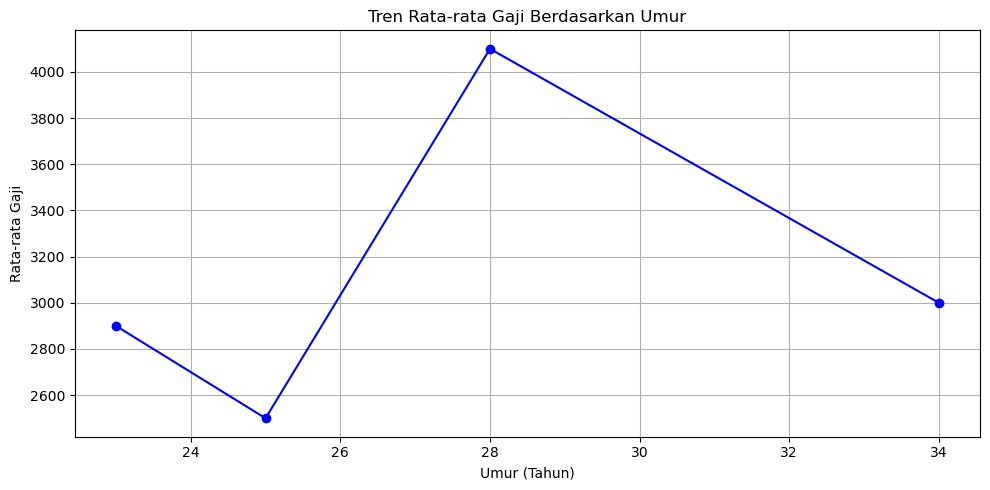

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

# Buat Spark session
spark = SparkSession.builder.appName("VisualisasiGaji").getOrCreate()

# Data karyawan
karyawan = spark.createDataFrame([
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'P', 2500, 2)
], ['Nama', 'Umur', 'JK', 'Gaji', 'ID_Departemen'])

karyawan.createOrReplaceTempView('Karyawan')

# Query SQL
salary_trends = spark.sql('''
SELECT 
    Umur, 
    AVG(Gaji) AS RataRataGaji
FROM Karyawan
GROUP BY Umur
ORDER BY Umur
''').toPandas()

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Umur'], salary_trends['RataRataGaji'], marker='o', color='blue')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Rata-rata Gaji')
plt.title('Tren Rata-rata Gaji Berdasarkan Umur')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Homework
1. Tugas 1: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
2. Tugas 2: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
3. Tugas 3: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti SUM(), AVG(), COUNT(), serta JOIN antar tabel serta buat visualisasi yang menarik.

In [ ]:
Tugas 1: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.

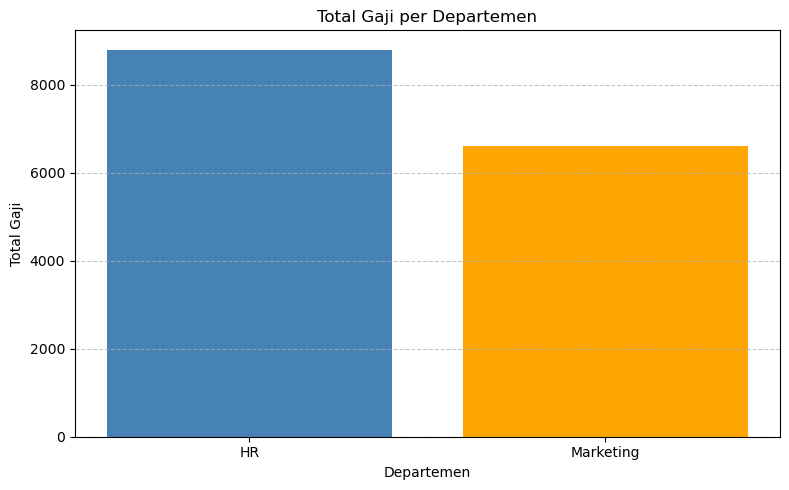


Data Tugas 1:
+---------------+----------+---------------+
|Nama_Departemen|Total_Gaji|Jumlah_Karyawan|
+---------------+----------+---------------+
|             HR|      8800|              3|
|      Marketing|      6600|              2|
+---------------+----------+---------------+



In [4]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import random

# Inisialisasi Spark
spark = SparkSession.builder.appName("AnalisisSparkSQL").getOrCreate()

# Data awal
karyawan = spark.createDataFrame([
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'P', 2500, 2)
], ['Nama', 'Umur', 'JK', 'Gaji', 'ID_Departemen'])

departemen = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['ID_Departemen', 'Nama_Departemen'])

karyawan.createOrReplaceTempView('Karyawan')
departemen.createOrReplaceTempView('Departemen')

# Query SQL
total_gaji = spark.sql('''
SELECT 
    d.Nama_Departemen,
    SUM(k.Gaji) AS Total_Gaji,
    COUNT(k.Nama) AS Jumlah_Karyawan
FROM Karyawan k
JOIN Departemen d ON k.ID_Departemen = d.ID_Departemen
GROUP BY d.Nama_Departemen
ORDER BY d.Nama_Departemen
''')

# Konversi ke Pandas untuk visualisasi
pdf = total_gaji.toPandas()

# Visualisasi perbandingan antar departemen
plt.figure(figsize=(8, 5))
plt.bar(pdf['Nama_Departemen'], pdf['Total_Gaji'], color=['steelblue', 'orange'])
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('Total Gaji per Departemen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nData Tugas 1:")
total_gaji.show()

In [ ]:
Tugas 2: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.

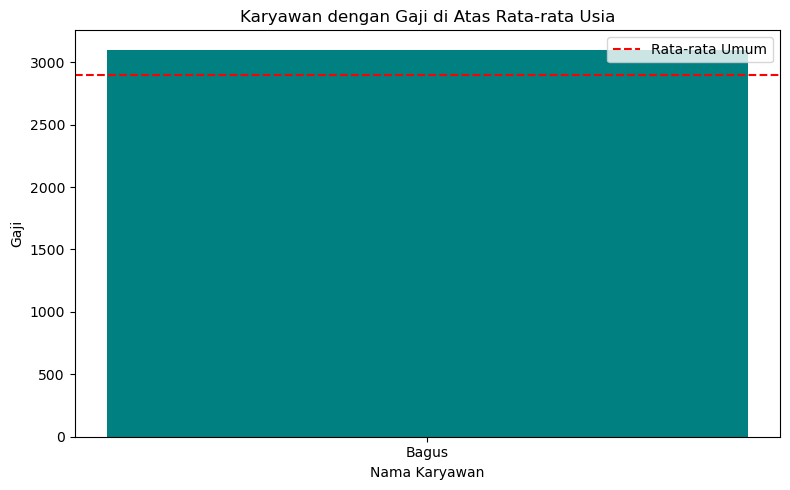


Data Tugas 2:
+-----+----+----+------------+
| Nama|Umur|Gaji|RataRataGaji|
+-----+----+----+------------+
|Bagus|  23|3100|      2900.0|
+-----+----+----+------------+



In [14]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import random

# Inisialisasi Spark
spark = SparkSession.builder.appName("AnalisisSparkSQL").getOrCreate()

# Data awal
karyawan = spark.createDataFrame([
    ('Hanif', 34, 'L', 3000, 1),
    ('Andra', 28, 'L', 4100, 2),
    ('Putri', 23, 'P', 2700, 1),
    ('Bagus', 23, 'L', 3100, 1),
    ('Nanda', 25, 'P', 2500, 2)
], ['Nama', 'Umur', 'JK', 'Gaji', 'ID_Departemen'])

departemen = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['ID_Departemen', 'Nama_Departemen'])

karyawan.createOrReplaceTempView('Karyawan')
departemen.createOrReplaceTempView('Departemen')

# Hitung rata-rata gaji per umur
avg_per_age = spark.sql('''
SELECT Umur, AVG(Gaji) AS RataRataGaji
FROM Karyawan
GROUP BY Umur
''')
avg_per_age.createOrReplaceTempView('RataGajiUmur')

# Temukan karyawan yang di atas rata-rata usia-nya
above_avg = spark.sql('''
SELECT k.Nama, k.Umur, k.Gaji, r.RataRataGaji
FROM Karyawan k
JOIN RataGajiUmur r ON k.Umur = r.Umur
WHERE k.Gaji > r.RataRataGaji
ORDER BY k.Umur
''')

# Visualisasi
pdf2 = above_avg.toPandas()

plt.figure(figsize=(8, 5))
plt.bar(pdf2['Nama'], pdf2['Gaji'], color='teal')
plt.axhline(y=pdf2['RataRataGaji'].mean(), color='red', linestyle='--', label='Rata-rata Umum')
plt.xlabel('Nama Karyawan')
plt.ylabel('Gaji')
plt.title('Karyawan dengan Gaji di Atas Rata-rata Usia')
plt.legend()
plt.tight_layout()
plt.show()

print("\nData Tugas 2:")
above_avg.show()

In [ ]:
    Tugas 3: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti SUM(), AVG(), COUNT(), serta JOIN antar tabel serta buat visualisasi yang menarik.

Total data karyawan: 100

Metadata kolom Umur dan Gaji:
+-------+----------------+-----------------+
|summary|            Umur|             Gaji|
+-------+----------------+-----------------+
|  count|             100|              100|
|   mean|           29.35|           4045.5|
| stddev|3.20786596359699|570.0033226910066|
|    min|              23|             2500|
|    max|              36|             5200|
+-------+----------------+-----------------+


Daftar lengkap 100 karyawan:
+---------+----+---+----+-------------+
|Nama     |Umur|JK |Gaji|ID_Departemen|
+---------+----+---+----+-------------+
|Hanif    |34  |L  |3500|1            |
|Andra    |28  |L  |4100|2            |
|Putri    |23  |P  |2700|1            |
|Bagus    |23  |L  |3100|1            |
|Nanda    |25  |P  |2500|2            |
|Rina     |26  |P  |3000|3            |
|Arif     |30  |L  |4000|3            |
|Lia      |27  |P  |3200|4            |
|Bayu     |29  |L  |3900|4            |
|Sinta    |31  |P  |4100|5  

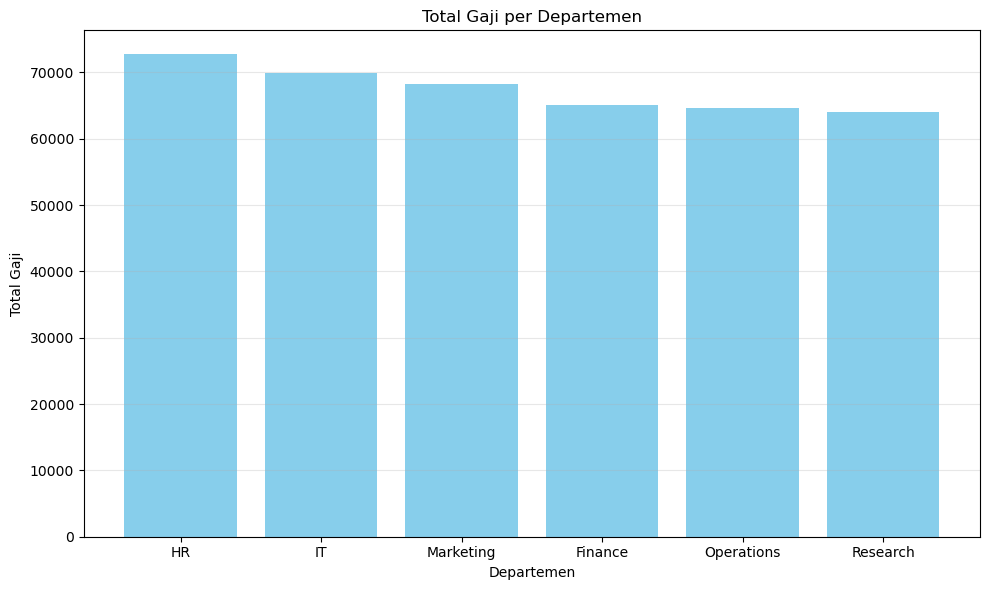

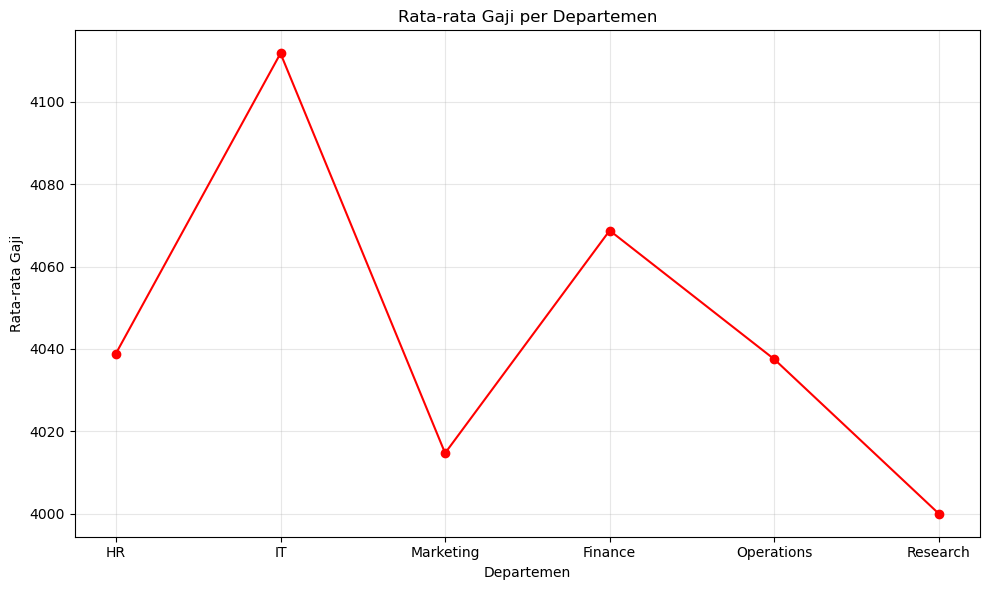


Top 3 karyawan dengan gaji tertinggi di setiap Departemen:
+---------------+---------+----+
|Nama_Departemen|Nama     |Gaji|
+---------------+---------+----+
|Finance        |Dong Ping|4900|
|Finance        |William  |4800|
|Finance        |Wu Hao   |4600|
|HR             |David    |5200|
|HR             |Steven   |5200|
|HR             |Alexander|4700|
|IT             |Benjamin |5100|
|IT             |Samuel   |4900|
|IT             |Xu Wei   |4700|
|Marketing      |Joseph   |5000|
|Marketing      |Robert   |5000|
|Marketing      |Richard  |4800|
|Operations     |James    |5200|
|Operations     |Donald   |4700|
|Operations     |Paul     |4500|
|Research       |Michael  |5000|
|Research       |Lucas    |4800|
|Research       |Henry    |4600|
+---------------+---------+----+



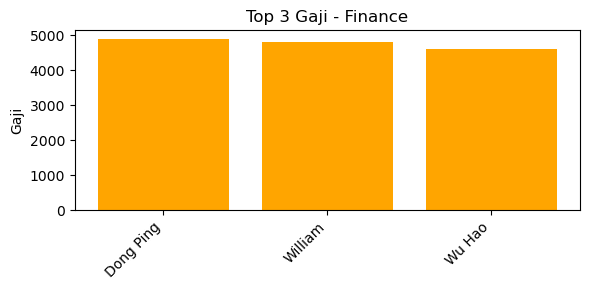

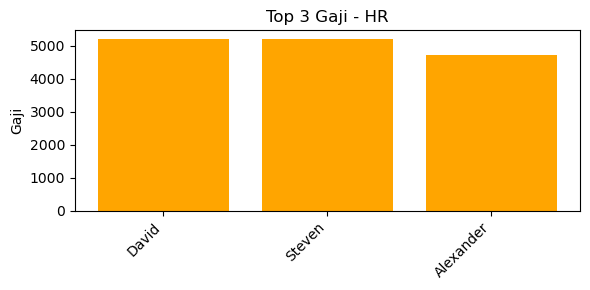

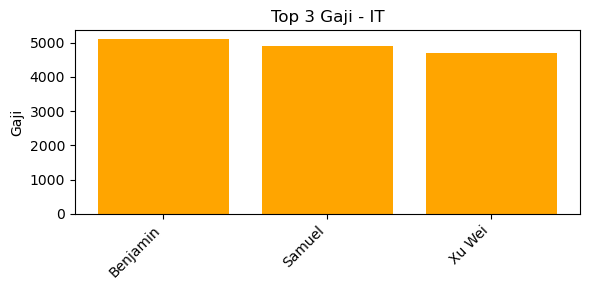

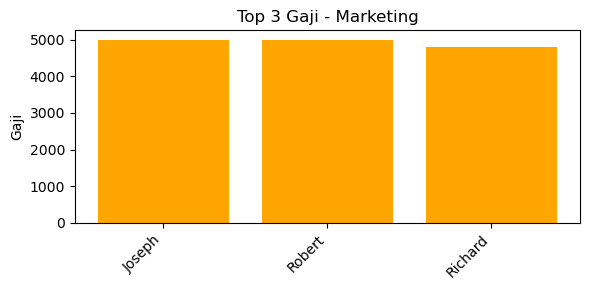

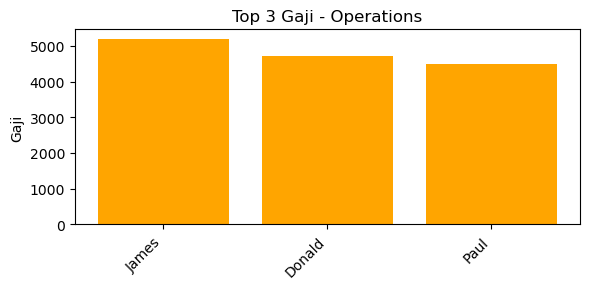

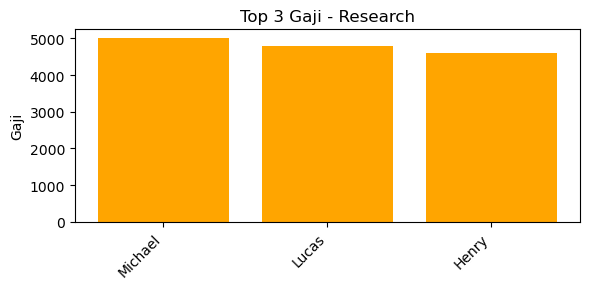


Distribusi gaji semua karyawan:


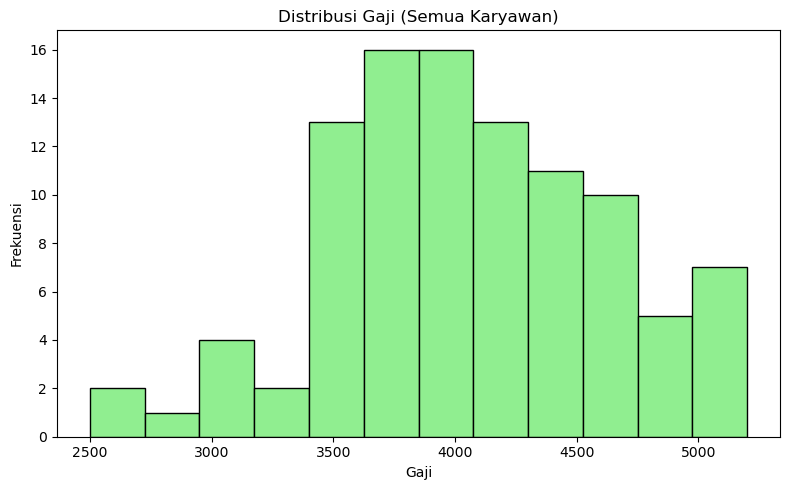


Boxplot gaji per Departemen:


<Figure size 1000x600 with 0 Axes>

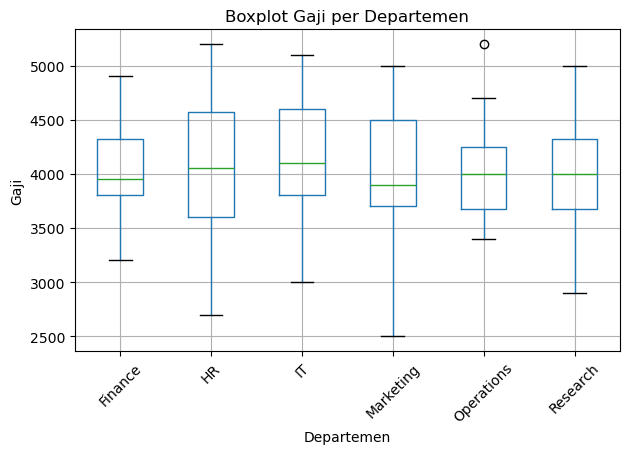


Analisis jumlah dan rata-rata gaji berdasarkan gender:
+------+------+------------+
|Gender|Jumlah|RataRataGaji|
+------+------+------------+
|     L|    53|     4388.68|
|     P|    47|     3658.51|
+------+------+------------+



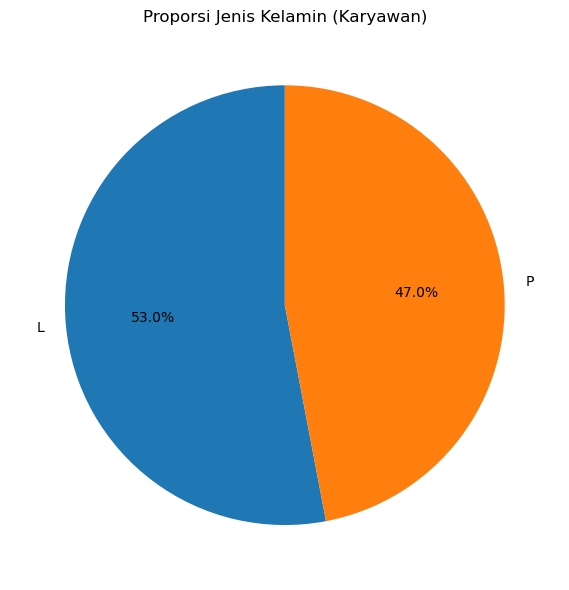


Tren rata-rata gaji berdasarkan umur dan departemen:
+----+---------------+---------------------+
|Umur|Nama_Departemen|Avg_Gaji_UMUR_DI_DEPT|
+----+---------------+---------------------+
|26  |Finance        |3725.0               |
|26  |Finance        |3725.0               |
|26  |Finance        |3725.0               |
|26  |Finance        |3725.0               |
|27  |Finance        |3550.0               |
|27  |Finance        |3550.0               |
|28  |Finance        |4000.0               |
|29  |Finance        |4125.0               |
|29  |Finance        |4125.0               |
|29  |Finance        |4125.0               |
|29  |Finance        |4125.0               |
|31  |Finance        |4300.0               |
|32  |Finance        |4700.0               |
|32  |Finance        |4700.0               |
|33  |Finance        |4000.0               |
|35  |Finance        |4900.0               |
|23  |HR             |2900.0               |
|23  |HR             |2900.0               |
|

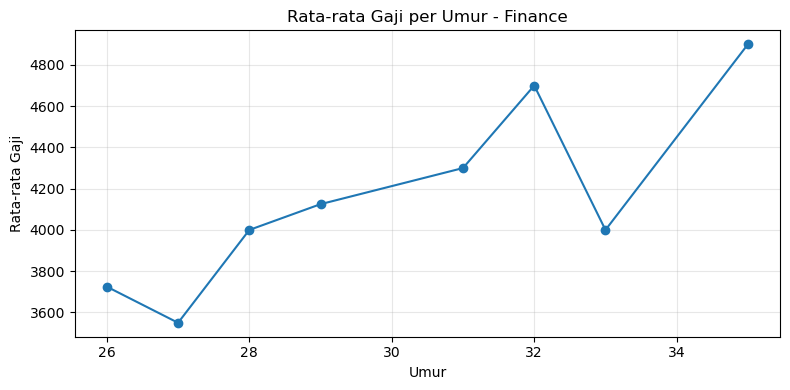

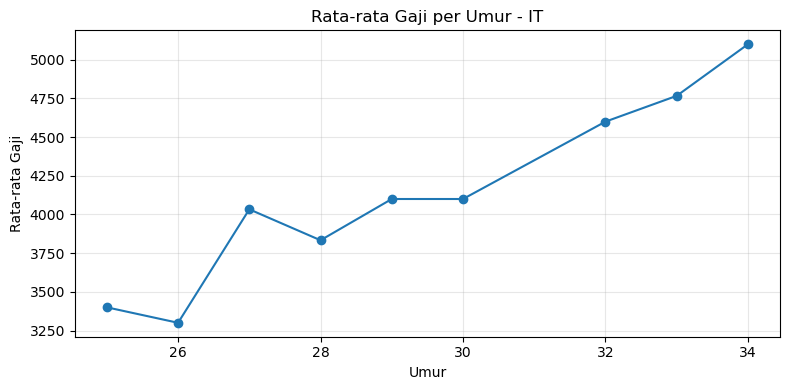

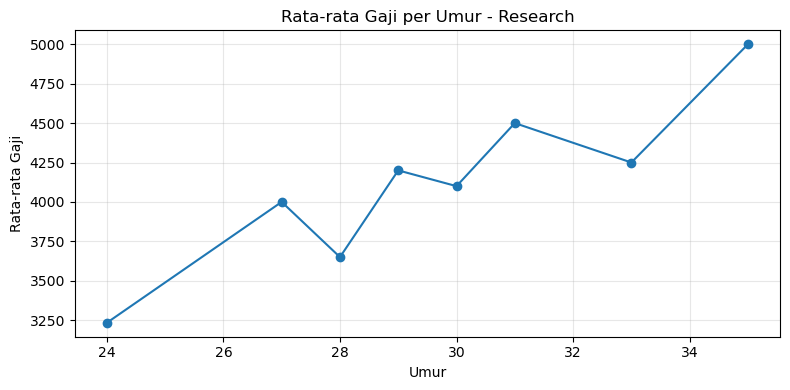

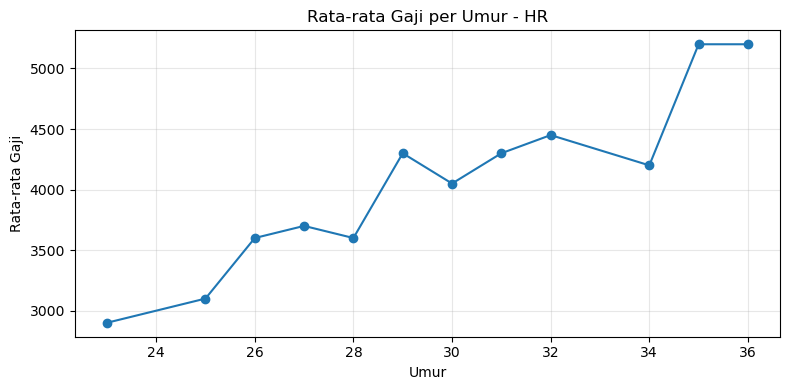

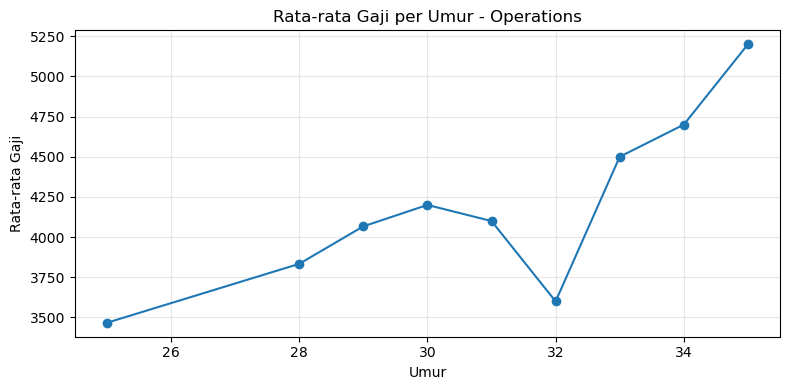

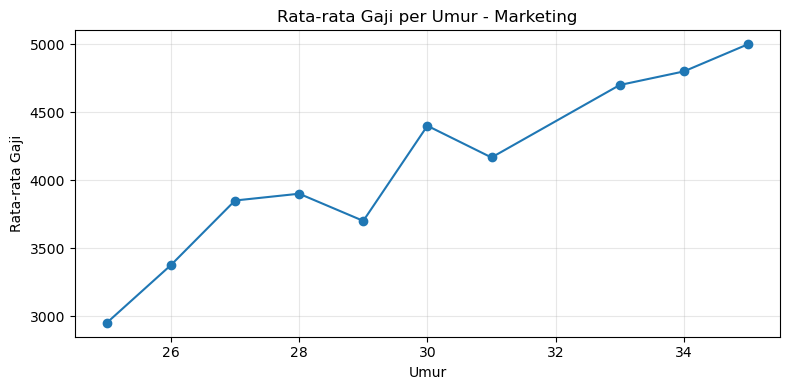

In [17]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi Spark
spark = SparkSession.builder.appName("AnalisisDataKaryawan").getOrCreate()

# Data departemen
departemen = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'IT'),
    (4, 'Finance'),
    (5, 'Operations'),
    (6, 'Research')
], ['ID_Departemen', 'Nama_Departemen'])

# Data 100 karyawan
data_karyawan = [
    ('Hanif', 34, 'L', 3500, 1), ('Andra', 28, 'L', 4100, 2), ('Putri', 23, 'P', 2700, 1), ('Bagus', 23, 'L', 3100, 1), ('Nanda', 25, 'P', 2500, 2),
    ('Rina', 26, 'P', 3000, 3), ('Arif', 30, 'L', 4000, 3), ('Lia', 27, 'P', 3200, 4), ('Bayu', 29, 'L', 3900, 4), ('Sinta', 31, 'P', 4100, 5),
    ('Budi', 32, 'L', 3600, 5), ('Tono', 33, 'L', 3700, 6), ('Maya', 24, 'P', 2900, 6), ('Wulan', 25, 'P', 3100, 1), ('Sari', 26, 'P', 3050, 2),
    ('Kevin', 27, 'L', 4200, 3), ('Brian', 29, 'L', 4400, 4), ('Jessica', 28, 'P', 3800, 5), ('Michael', 35, 'L', 5000, 6), ('Emily', 30, 'P', 4100, 1),
    ('John', 33, 'L', 4700, 2), ('Jack', 26, 'L', 3600, 3), ('William', 32, 'L', 4800, 4), ('Olivia', 29, 'P', 3900, 5), ('Ethan', 27, 'L', 4200, 6),
    ('Liam', 31, 'L', 4300, 1), ('Ava', 25, 'P', 3400, 2), ('Noah', 28, 'L', 4000, 3), ('Emma', 26, 'P', 3700, 4), ('James', 35, 'L', 5200, 5),
    ('Lucas', 33, 'L', 4800, 6), ('Mason', 29, 'L', 4600, 1), ('Sophia', 27, 'P', 3900, 2), ('Isabella', 30, 'P', 4200, 3), ('Charlotte', 28, 'P', 4000, 4),
    ('Harper', 25, 'P', 3500, 5), ('Henry', 31, 'L', 4600, 6), ('Alexander', 32, 'L', 4700, 1), ('Elijah', 30, 'L', 4400, 2), ('Benjamin', 34, 'L', 5100, 3),
    ('Daniel', 29, 'L', 4300, 4), ('Matthew', 28, 'L', 4000, 5), ('Abby', 27, 'L', 3800, 6), ('David', 36, 'L', 5200, 1), ('Joseph', 35, 'L', 5000, 2),
    ('Samuel', 33, 'L', 4900, 3), ('Grace', 29, 'P', 3900, 4), ('Chloe', 28, 'P', 3700, 5), ('Ella', 24, 'P', 3500, 6), ('Hannah', 26, 'P', 3600, 1),
    ('Zhang Wei', 31, 'L', 4100, 2), ('Li Na', 28, 'P', 3800, 3), ('Wang Fang', 33, 'P', 4000, 4), ('Chen Jie', 29, 'L', 4200, 5), ('Liu Yang', 30, 'L', 4300, 6),
    ('Huang Lei', 34, 'L', 4500, 1), ('Zhao Min', 26, 'P', 3700, 2), ('Sun Mei', 25, 'P', 3400, 3), ('Wu Hao', 32, 'L', 4600, 4), ('Gao Lin', 30, 'L', 4400, 5),
    ('Zheng Yu', 29, 'L', 4200, 6), ('Qian Xia', 27, 'P', 3700, 1), ('Tang Li', 31, 'P', 3900, 2), ('Xu Wei', 33, 'L', 4700, 3), ('Dong Ping', 35, 'L', 4900, 4),
    ('Guo Yue', 30, 'P', 4000, 5), ('Han Bing', 28, 'P', 3600, 6), ('Zhou Lei', 34, 'L', 4600, 1), ('Fan Lin', 27, 'L', 3800, 2), ('Yang Chen', 29, 'L', 4100, 3),
    ('He Ming', 31, 'L', 4300, 4), ('Jin Hua', 25, 'P', 3500, 5), ('Lin Xiao', 24, 'P', 3300, 6), ('Yao Qi', 30, 'P', 4000, 1), ('Wei Fang', 28, 'P', 3700, 2),
    ('Mark', 27, 'L', 4100, 3), ('Anna', 26, 'P', 3800, 4), ('Paul', 33, 'L', 4500, 5), ('George', 31, 'L', 4400, 6), ('Helen', 29, 'P', 4000, 1),
    ('Robert', 35, 'L', 5000, 2), ('Mary', 28, 'P', 3700, 3), ('Linda', 26, 'P', 3600, 4), ('Barbara', 25, 'P', 3400, 5), ('Patricia', 30, 'P', 4000, 6),
    ('Jennifer', 32, 'P', 4200, 1), ('Richard', 34, 'L', 4800, 2), ('Charles', 33, 'L', 4700, 3), ('Josephine', 27, 'P', 3900, 4), ('Dorothy', 29, 'P', 4100, 5),
    ('Harry', 28, 'L', 3700, 6), ('Steven', 35, 'L', 5200, 1), ('Andrew', 31, 'L', 4500, 2), ('Thomas', 32, 'L', 4600, 3), ('Margaret', 26, 'P', 3800, 4),
    ('Donald', 34, 'L', 4700, 5), ('Karen', 30, 'P', 4000, 6), ('Nancy', 28, 'P', 3600, 1), ('Betty', 29, 'P', 3700, 2), ('Sandra', 27, 'P', 3800, 3)
]

# Buat DataFrame dan view SQL
karyawan = spark.createDataFrame(data_karyawan, ['Nama', 'Umur', 'JK', 'Gaji', 'ID_Departemen'])
karyawan.createOrReplaceTempView('Karyawan')
departemen.createOrReplaceTempView('Departemen')

print("Total data karyawan:", karyawan.count())
print("\nMetadata kolom Umur dan Gaji:")
karyawan.select("Umur", "Gaji").describe().show()

print("\nDaftar lengkap 100 karyawan:")
karyawan.show(100, truncate=False)

print("\nGabungan data Karyawan dengan Departemen:")
karyawan_joined = spark.sql('''
SELECT k.Nama, k.Umur, k.JK, k.Gaji, d.Nama_Departemen
FROM Karyawan k
JOIN Departemen d ON k.ID_Departemen = d.ID_Departemen
''')
karyawan_joined.show(10, truncate=False)

print("\nAnalisis agregasi per Departemen:")
agg_dept = spark.sql('''
SELECT
  d.Nama_Departemen,
  COUNT(k.Nama) AS Jumlah_Karyawan,
  ROUND(AVG(k.Gaji), 2) AS RataRata_Gaji,
  SUM(k.Gaji) AS Total_Gaji,
  MIN(k.Gaji) AS Min_Gaji,
  MAX(k.Gaji) AS Max_Gaji
FROM Karyawan k
JOIN Departemen d ON k.ID_Departemen = d.ID_Departemen
GROUP BY d.Nama_Departemen
ORDER BY Total_Gaji DESC
''')
agg_dept.show()

# Visualisasi total gaji per departemen
pdf_dept = agg_dept.toPandas()
plt.figure(figsize=(10,6))
plt.bar(pdf_dept['Nama_Departemen'], pdf_dept['Total_Gaji'], color='skyblue')
plt.title('Total Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Rata-rata gaji per departemen
plt.figure(figsize=(10,6))
plt.plot(pdf_dept['Nama_Departemen'], pdf_dept['RataRata_Gaji'], marker='o', color='red')
plt.title('Rata-rata Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Rata-rata Gaji')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Top 3 gaji karyawan
print("\nTop 3 karyawan dengan gaji tertinggi di setiap Departemen:")
top_per_dept = spark.sql('''
SELECT Nama_Departemen, Nama, Gaji
FROM (
  SELECT d.Nama_Departemen, k.Nama, k.Gaji,
         ROW_NUMBER() OVER (PARTITION BY k.ID_Departemen ORDER BY k.Gaji DESC) AS rn
  FROM Karyawan k
  JOIN Departemen d ON k.ID_Departemen = d.ID_Departemen
) t
WHERE rn <= 3
ORDER BY Nama_Departemen, rn
''')
top_per_dept.show(30, truncate=False)

pdf_top = top_per_dept.toPandas()
for dept in pdf_top['Nama_Departemen'].unique():
    sub = pdf_top[pdf_top['Nama_Departemen'] == dept]
    plt.figure(figsize=(6,3))
    plt.bar(sub['Nama'], sub['Gaji'], color='orange')
    plt.title(f"Top 3 Gaji - {dept}")
    plt.ylabel("Gaji")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Distribusi gaji
print("\nDistribusi gaji semua karyawan:")
pdf_all = karyawan_joined.toPandas()
plt.figure(figsize=(8,5))
plt.hist(pdf_all['Gaji'], bins=12, color='lightgreen', edgecolor='black')
plt.title('Distribusi Gaji (Semua Karyawan)')
plt.xlabel('Gaji')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Visualisasi gaji
print("\nBoxplot gaji per Departemen:")
plt.figure(figsize=(10,6))
pdf_all.boxplot(column='Gaji', by='Nama_Departemen', rot=45)
plt.title('Boxplot Gaji per Departemen')
plt.suptitle('')
plt.xlabel('Departemen')
plt.ylabel('Gaji')
plt.tight_layout()
plt.show()

print("\nAnalisis jumlah dan rata-rata gaji berdasarkan gender:")
gender_stats = spark.sql('''
SELECT JK AS Gender, COUNT(*) AS Jumlah, ROUND(AVG(Gaji),2) AS RataRataGaji
FROM Karyawan
GROUP BY JK
''')
gender_stats.show()

pdf_gender = gender_stats.toPandas()
plt.figure(figsize=(6,6))
plt.pie(pdf_gender['Jumlah'], labels=pdf_gender['Gender'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Jenis Kelamin (Karyawan)')
plt.tight_layout()
plt.show()

print("\nTren rata-rata gaji berdasarkan umur dan departemen:")
trend_salary = spark.sql('''
SELECT
  k.Umur,
  d.Nama_Departemen,
  ROUND(AVG(k.Gaji) OVER (PARTITION BY k.ID_Departemen, k.Umur),2) AS Avg_Gaji_UMUR_DI_DEPT
FROM Karyawan k
JOIN Departemen d ON k.ID_Departemen = d.ID_Departemen
ORDER BY d.Nama_Departemen, k.Umur
''')
trend_salary.show(30, truncate=False)

pdf_trend = trend_salary.select("Nama_Departemen","Umur","Avg_Gaji_UMUR_DI_DEPT").distinct().toPandas()
for dept in pdf_trend['Nama_Departemen'].unique():
    sub = pdf_trend[pdf_trend['Nama_Departemen']==dept].sort_values('Umur')
    plt.figure(figsize=(8,4))
    plt.plot(sub['Umur'], sub['Avg_Gaji_UMUR_DI_DEPT'], marker='o')
    plt.title(f'Rata-rata Gaji per Umur - {dept}')
    plt.xlabel('Umur')
    plt.ylabel('Rata-rata Gaji')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()